In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import os
import glob
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

In [7]:
truth_X = [200, 300, 400, 750, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 6000]
truth_S = [70, 100, 170, 200, 250, 300, 400, 500, 750, 1000, 1500, 2000, 2500, 3000, 4000, 5000]

In [15]:
from plotting_tools import annotate_heatmap
from matplotlib.colors import LogNorm

labels_x = []
labels_s = []
for x in sorted(set(truth_X)):
    labels_x.append(str(x))
for s in sorted(set(truth_S)):
    labels_s.append(str(s))
        
def plot_limits(exp_limits,
                name='',
                title='',
                cbar_label='95% CL Upper Limit on Cross Section [fb]',
                cmap='Blues',
                color_threshold=0.5,
                comparison=False):
    
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7, 7))

    if not comparison:
        im = ax.imshow(exp_limits, cmap=cmap, norm=LogNorm(vmin=0.1, vmax=350))
    else:
        im = ax.imshow(exp_limits, cmap=cmap, vmin=-100, vmax=100)

    texts = annotate_heatmap(im, data=None, valfmt="{x:.1f}", threshold=color_threshold,
                             fontsize=9, ha="center", va="center")

    cbar = ax.figure.colorbar(im)
    cbar.ax.set_ylabel("", rotation=-90, va="bottom")
    cbar.set_label(cbar_label, rotation=90, size=15, labelpad=15)

    #Show all ticks and label them with the respective list entries

    ax.set_xticks(np.arange(len(labels_x)), labels=labels_x)
    ax.set_yticks(np.arange(len(labels_s)), labels=labels_s)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    ax.set_xlabel('$m_{X}$ [GeV]', fontsize=18)
    ax.set_ylabel('$m_{S}$ [GeV]', fontsize=18)
    ax.set_title(title, fontsize=14, loc='right')

    fig.tight_layout()
    print("Saving... plots_fit" +"/"+  "Limits_NF_" + name + '.pdf')
    plt.savefig("plots_fit" +"/"+  "Limits_NF_" + name + '.pdf')
    plt.show()

In [25]:
limits_2d_99     = np.load(f'plots_fit_LR_2b1j_2dfit_seeds25_latest_files_2025-01-09/saved_limits.npz')
exp_limits_2d_99 = limits_2d_99['arr_0']

limits_2d_99_new     = np.load(f'plots_fit_LR_2b1j_2dfit_seeds25_99contour_2025-02-12/saved_limits.npz')
exp_limits_2d_99_new = limits_2d_99_new['arr_0']

limits_2d_99_new_PU     = np.load(f'plots_fit_LR_2b1j_2dfit_seeds25_with_PUW_2025-02-12/saved_limits.npz')
exp_limits_2d_99_new_PU = limits_2d_99_new_PU['arr_0']

limits_2d_99_new_PU_BSW     = np.load(f'plots_fit_LR_2b1j_2dfit_seeds25_with_PUW_BSW_2025-02-12/saved_limits.npz')
exp_limits_2d_99_new_PU_BSW = limits_2d_99_new_PU_BSW['arr_0']

limits_2d_99_new_100bins     = np.load(f'plots_fit_LR_2b1j_2dfit_seeds25_100_bins_2025-02-12/saved_limits.npz')
exp_limits_2d_99_new_100bins = limits_2d_99_new_100bins['arr_0']


plot_limits(exp_limits_2d_99_new, name='test')

/tmp/ipykernel_807/3601824388.py:1: RuntimeWarning: invalid value encountered in subtract
  perc_diff = (exp_limits_2d_99_new_100bins - exp_limits_2d_99_new) / exp_limits_2d_99_new * 100


Saving... plots_fit/Limits_NF_30bins_VS_100bins_perc_diff_12Feb.pdf


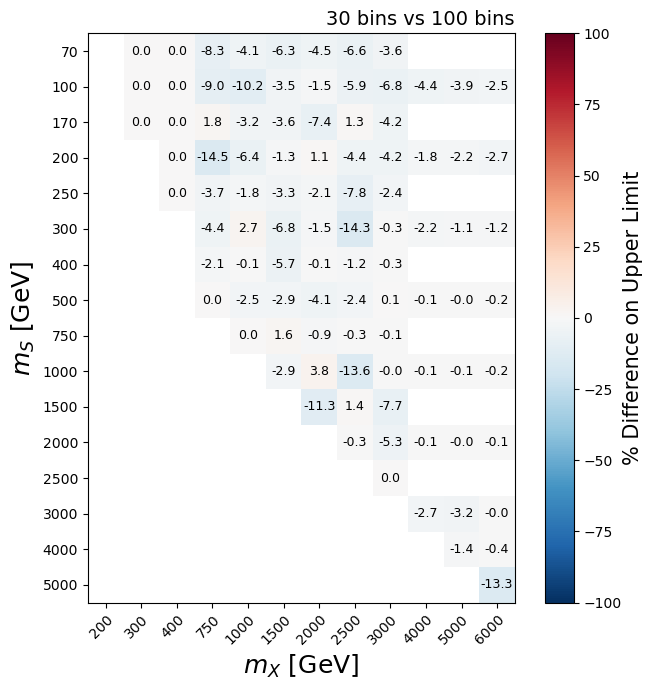

In [26]:
perc_diff = (exp_limits_2d_99_new_100bins - exp_limits_2d_99_new) / exp_limits_2d_99_new * 100
plot_limits(perc_diff, name='30bins_VS_100bins_perc_diff_12Feb',
            title='30 bins vs 100 bins',
            cbar_label='% Difference on Upper Limit',
            cmap='RdBu_r',
            color_threshold=100,
            comparison=True)